## Multiple Linear Regression

In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

## Read csv file

In [2]:
import pandas as pd
df = pd.read_csv("Multiple Lreg.ipynb.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [7]:
df.duplicated().sum()

0

## Seperate x and y

In [11]:
X = df[['RND','ADMIN','MKT']]
Y = df[['PROFIT']]

In [12]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [13]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Create a linear regression model

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

### Cheack intersept and Coefficient

In [15]:
model.intercept_

array([50122.19298987])

In [16]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [17]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

## PROFIT_pred = 50122.19 + 0.8057xRND - 0.0268xADMIN + 0.0272xMKT

In [18]:
coef = pd.Series(model.coef_.flatten())
coef.index = X.columns
coef

RND      0.805715
ADMIN   -0.026816
MKT      0.027228
dtype: float64

<Axes: title={'center': 'Coefficient of Linear,Reg'}>

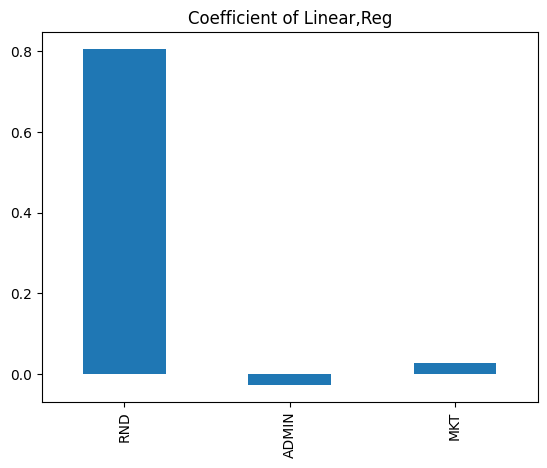

In [19]:
coef.plot(kind='bar', title='Coefficient of Linear,Reg')

1. IF RND increases by 1000 , PROFIT increases by 805.7
2. IF ADMIN increase by 1000 , PROFIT decrease by 26.8
3. IF MKT increases by 1000, PROFIT increase by 27.2

### Evalute the model

In [21]:
# R2 Score
model.score(X,Y)

0.9507459940683246

### Predict the result for X

In [23]:
ypred = model.predict(X)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [24]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### MSE, RMSE, MAE, R2

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [26]:
mse = mean_squared_error(Y,ypred)
mse

78417126.01913083

In [27]:
rmse = mse**(1/2)
rmse

8855.34448901514

In [28]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y,ypred)
mape

0.10601209160494125

In [29]:
from sklearn.metrics import r2_score
r2 = r2_score(Y,ypred)
r2

0.9507459940683246

### Above model is good and can be used to sample model prediction

In [31]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [32]:
Xnew = [[100000,30000,50000]]
model.predict(Xnew)

array([[131250.62216964]])

In [33]:
Xnew = [[100000,30000,70000]]
model.predict(Xnew)

array([[131795.18346565]])